# Ocean Health Dataset EDA

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sys
import datetime as dt

v = sys.version_info
print(f"Python version {v.major}.{v.minor}.{v.micro}")
print(f"Run at {dt.datetime.now()}")

Python version 3.12.12
Run at 2026-02-08 09:17:46.294274


In [2]:
df = pd.read_csv("../data/ocean_health_index.csv")
print(df.shape)
print(df.columns)

(194, 15)
Index(['REF_AREA', 'REF_AREA_LABEL', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='str')


In [4]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_AREA        194 non-null    str    
 1   REF_AREA_LABEL  194 non-null    str    
 2   2012            194 non-null    float64
 3   2013            194 non-null    float64
 4   2014            194 non-null    float64
 5   2015            194 non-null    float64
 6   2016            194 non-null    float64
 7   2017            194 non-null    float64
 8   2018            194 non-null    float64
 9   2019            194 non-null    float64
 10  2020            194 non-null    float64
 11  2021            194 non-null    float64
 12  2022            194 non-null    float64
 13  2023            194 non-null    float64
 14  2024            194 non-null    float64
dtypes: float64(13), str(2)
memory usage: 22.9 KB
None


In [5]:
print(df.describe())

             2012        2013        2014        2015        2016        2017  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean    69.138144   69.758299   70.184742   70.746031   70.863247   70.788247   
std      5.969848    5.936358    6.010257    6.019021    6.025836    6.173841   
min     48.670000   48.780000   50.870000   51.230000   50.930000   51.110000   
25%     65.105000   65.440000   66.080000   66.992500   67.337500   67.337500   
50%     69.665000   70.135000   70.605000   71.120000   71.185000   71.200000   
75%     72.875000   73.425000   74.202500   74.872500   74.777500   74.825000   
max     82.740000   82.130000   83.060000   83.490000   83.440000   84.350000   

             2018        2019        2020        2021        2022        2023  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean    70.984536   71.217320   71.448144   71.356649   71.382062   66.585361   
std      6.195274    6.1754

In [6]:
df_long = df.melt(id_vars=["REF_AREA", "REF_AREA_LABEL"], var_name="Year")

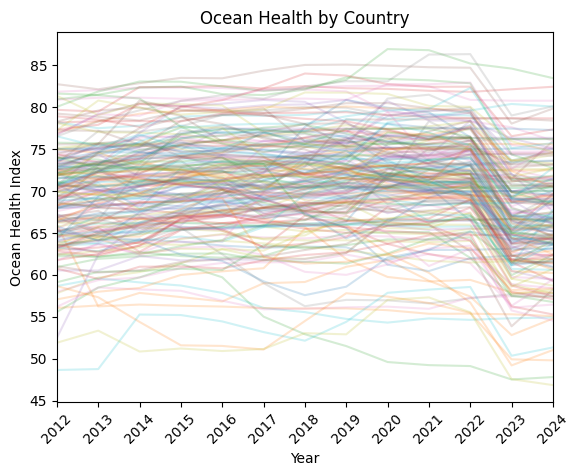

In [131]:
for country_code, df_country in df.groupby("REF_AREA"):
    plt.plot(
        df_country.columns[2:],
        df_country.iloc[0, 2:],
        label=df_country["REF_AREA_LABEL"].values[0],
        alpha=0.2,
    )

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Ocean Health Index")
plt.title("Ocean Health by Country")
plt.margins(x=0)
plt.show()

In [132]:
kdes = {}
health_index_range = np.linspace(0.8 * df.iloc[:, 2:].min().min(), 100, 100)

for year in df.columns[2:]:
    kde = stats.gaussian_kde(df[year])
    kdes[year] = kde(health_index_range)

Text(0.5, 0.5, 'Ocean Health Index')

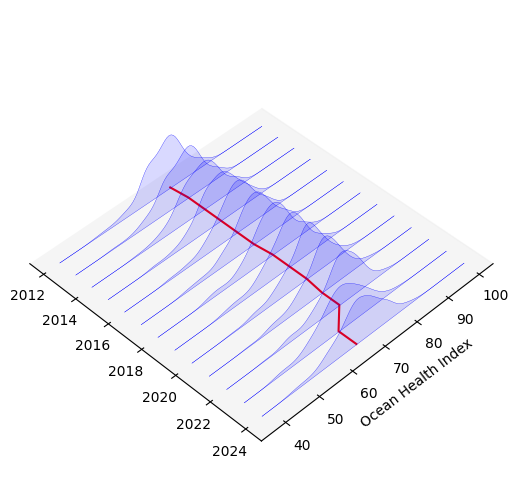

In [191]:
x = [int(i) for i in kdes.keys()]
y = health_index_range

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
ax.set_box_aspect((1, 1, 0.25))
for year in kdes.keys():
    # ax.plot(int(year), health_index_range, kdes[year], label=year,color='blue', alpha=0.25)
    ax.fill_between(
        int(year),
        health_index_range,
        0,
        int(year),
        health_index_range,
        kdes[year],
        linewidth=0.2,
        edgecolor="blue",
        color="blue",
        alpha=0.15,
    )

ax.plot(
    x,
    [y[np.argmax(k)] for k in kdes.values()],
    zs=0,
    zdir="z",
    label="map",
    color="red",
)
ax.set_zticks([])
ax.grid(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # YZ plane
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # XZ plane
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.view_init(elev=45, azim=315)
ax.set_ylabel("Ocean Health Index")

Open questions:

* Weight by area, not by country.
* Group: what happened in 2022, either to negatively affect ocean health across the board or to redefine the metric itself?
* Individual: most improved/regressed? 
* can we group these?
* bring in exogeneous variables?